In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import maxwell

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [13]:
t_max = 100
dt = .002
N = 64
lam = 0.1931833275037836

In [14]:
def init(N, L, lattice_constant):
    
    positions = list(np.arange(-L/2., L/2., lattice_constant))
    r0 = np.array(np.meshgrid(positions, positions, positions)).T.reshape(-1,3)
    p0 = maxwell.rvs(loc=0, scale=1.5, size=(N,3)) / np.sqrt(1.5)
    
    return r0, p0

In [15]:
r0, p0 = init(N=64, L=6., lattice_constant=1.5)

In [16]:
R, P, t = a.BABAB_Ndim(r0, p0, t_max, dt, f.LJ_force, lam, thermal_noise=False,
                       periodic={'PBC': True, 'box_size': 6., 'closed': False})

  0%|          | 0/49999 [00:00<?, ?it/s]/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:140: RuntimeWarning: divide by zero encountered in true_divide
  f = (48 * np.power(1, 12) / np.power(distances, 13) - 24 * np.power(1, 6) / np.power(distances, 7)) / distances
/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:140: RuntimeWarning: invalid value encountered in subtract
  f = (48 * np.power(1, 12) / np.power(distances, 13) - 24 * np.power(1, 6) / np.power(distances, 7)) / distances
100%|██████████| 49999/49999 [01:26<00:00, 576.09it/s]


In [21]:
def calc_energy(r, p, sigma=1):
        
    idx = np.arange(len(r))
    pairs = np.meshgrid(idx, idx)
    distances = np.linalg.norm(r[pairs[0]] - r[pairs[1]], axis=-1)
    
    V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6)).sum()
    
    T = (np.linalg.norm(p, axis=1)**2 / 2.).sum()
    
    return V + T

In [22]:
E = np.zeros(len(t))
for i in tqdm(range(len(t))):
    E[i] = calc_energy(R[i], P[i])

  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-21-cecf974ec684>:7: RuntimeWarning: divide by zero encountered in true_divide
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6)).sum()
<ipython-input-21-cecf974ec684>:7: RuntimeWarning: invalid value encountered in subtract
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6)).sum()
100%|██████████| 50000/50000 [00:18<00:00, 2752.76it/s]


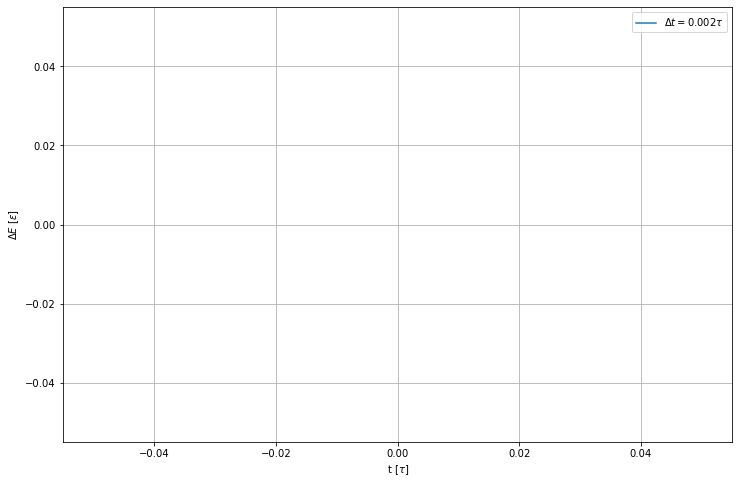

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(t, E-E[0], label=r'$\Delta t=0.002\tau$')
ax1.set_xlabel(r't $[\tau]$')
ax1.set_ylabel(r'$\Delta E$ $[\epsilon]$')
ax1.legend()
ax1.grid(True)
plt.show()

In [7]:
np.random.uniform(low=-6., high=6., size=3)

array([ 1.48247115, -5.33275721, -1.57313102])

In [ ]:
N = 64
r = np.random.rand(N, 3)
idx = np.arange(N)
pairs = np.meshgrid(idx, idx)

separations = r[pairs[0]] - r[pairs[1]]
distances = np.linalg.norm(r[pairs[0]] - r[pairs[1]], axis=-1)
distances2 = np.linalg.norm(separations, axis=-1)

In [ ]:
f = (48 * np.power(1, 12) / np.power(distances, 13) - 24 * np.power(1, 6) / np.power(distances, 7)) / distances

In [ ]:
f[np.isnan(f)] = 0.

In [ ]:
f[0,:]

In [ ]:
separations[0,:,:]

In [ ]:
f[0,1]

In [ ]:
separations[0,1,:]

In [ ]:
f[0,1]*separations[0,1,:]

In [ ]:
force[0].sum(axis=0)

In [ ]:
force = (np.expand_dims(f[:,:], axis=0).T*separations[:,:,:]).sum(axis=0)